In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import FontManager

import warnings
warnings.filterwarnings("ignore")

URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)
URL4 = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL4)

In [15]:
dfs = pd.read_html('https://fbref.com/es/jugadores/15ab5a2b/Julian-Alvarez')


In [76]:
dfs = pd.read_html('https://fbref.com/es/jugadores/6c513f98/scout/12417/Informe-de-reclutamiento-de-Adrian-Martinez')[2]

In [3]:
df_percentil = dfs[0]
#df_percentil.columns = df_percentil.columns.droplevel(0)
df_percentil.Estadísticas.unique()

array(['Goles sin penalización',
       'npxG: Goles esperados (xG) sin contar penaltis',
       'Total de disparos', 'Asistencias',
       'xAG: Exp. Objetivos asistidos', 'npxG + xAG',
       'Acciones para la creación de tiros', nan, 'Pases intentados',
       '% de pase completo', 'Pases progresivos', 'Acarreos progresivos',
       'Tomas exitosas', 'Toques (Ataq. pen.)', 'Pases progresivos Rec',
       'Derribos', 'Intercepciones', 'Bloqueos', 'Despeje',
       'Aéreos Ganados'], dtype=object)

In [16]:
percentiles = dfs[0]

In [17]:
percentiles

,Estadísticas,Por 90,Percentil
0,Goles sin penalización,0.43,94.0
1,npxG: Goles esperados (xG) sin contar penaltis,0.41,96.0
2,Total de disparos,3.41,93.0
3,Asistencias,0.31,85.0
4,xAG: Exp. Objetivos asistidos,0.24,70.0
5,npxG + xAG,0.65,94.0
6,Acciones para la creación de tiros,4.46,73.0
7,NaN,NaN,NaN
8,Pases intentados,44.31,71.0
9,% de pase completo,81.0%,85.0


In [18]:
df_percentiles = dfs[0]
#df_percentiles.columns = df_percentiles.columns.droplevel(0)
#df_percentiles['Percentil'] = df_percentiles['Percentil'].astype(int)
df_percentiles['Estadísticas'] = df_percentiles['Estadísticas'].replace('npxG: Goles esperados (xG) sin contar penaltis', 'npxG')

In [32]:
stats_defensores = {
    'Defensa': ['% de Dribladores Derribados', 'Intercepciones', 'Recuperación de pelotas', 'Derribos conseguidos', 'Bloqueos', 'Faltas cometidas'],
    'Pases': ['xA: Asistencias Esperadas', 'Pases progresivos'],
    'Acciones ofensivas': ['npxG + xAG','npxG: Goles esperados (xG) sin contar penaltis', 'Acarreos progresivos', 'Acciones para la creación de tiros', 'Tomas exitosas', '% de toma exitosa']
}

stats_medios = {
    'Pases': ['Pases progresivos', 'xA: Asistencias Esperadas', '% de pase completo', 'Pases al área de penalización', 'xAG: Exp. Assisted Goals'],
    'Acciones ofensivas': ['npxG: Goles esperados (xG) sin contar penaltis', 'Acarreos progresivos', '% de toma exitosa', 'Toques (Ataq. pen.)'],
    'Acciones defensivas': ['% de Dribladores Derribados', 'Intercepciones', 'Recuperación de pelotas', 'Faltas cometidas']
}

stats_delanteros = {
    'Acciones ofensivas': ['npxG', 'npxG + xAG', 'Total de disparos','Disparos en el Objetivo %', 'npxG/Shot', 'Acciones para la creación de tiros', 'Toques (Ataq. pen.)', 'Acarreos progresivos'],
    'Pases': ['xA: Asistencias Esperadas', 'Pases progresivos', 'Pases al área de penalización', 'Pases progresivos Rec'],
    'Defensa': ['Tkl+Int', 'Bloqueos','Derribos (3.º ataq.)']
}

reemplazos = {
    'Recuperación de pelotas': 'Recuperación\nde pelotas',
    '% de Dribladores Derribados': '% de amagues\nevitados',
    'xA: Asistencias Esperadas': 'xA',
    '% de toma exitosa': '% de amagues\ncompletados',
    'Acciones para la creación de tiros': 'Acciones de\ncreación tiros',
    'Pases al área de penalización': 'Pases\nal área',
    'Disparos en el Objetivo %': '% de tiros\nal arco',
    'Pases progresivos Rec': 'Pases prog\nrecibidos',
    'Derribos (3.º ataq.)': 'Derribos\n(3.º ataq.)',
    'Toques (Ataq. pen.)': 'Toques en\nárea rival',
    'Tkl+Int': 'Entradas +\nIntercepciones',
    'Total de disparos': 'Tiros\ntotales',
    '% de pase completo': '% de pases',
    'xAG: Exp. Assisted Goals': 'xGChain'
}

In [33]:
df_percentiles['color'] = np.where(df_percentiles['Percentil'] < 20, 'red',
                                    np.where((df_percentiles['Percentil'] >= 20) & (df_percentiles['Percentil'] < 40), 'orange',
                                        np.where((df_percentiles['Percentil'] >= 40) & (df_percentiles['Percentil'] < 60), 'yellow',
                                            np.where((df_percentiles['Percentil'] >= 60) & (df_percentiles['Percentil'] < 80), 'lightgreen', 'green'))))


In [34]:
dataframes = []

for key in stats_delanteros.keys():
    placeholder = df_percentiles[df_percentiles['Estadísticas'].isin(stats_delanteros[key])].drop_duplicates().reset_index(drop=True)
    placeholder['Percentil'] = placeholder['Percentil'].astype(int)
    placeholder['color'] = np.where(placeholder['Percentil'] < 20, 'red',
                                    np.where((placeholder['Percentil'] >= 20) & (placeholder['Percentil'] < 40), 'orange',
                                        np.where((placeholder['Percentil'] >= 40) & (placeholder['Percentil'] < 60), 'yellow',
                                            np.where((placeholder['Percentil'] >= 60) & (placeholder['Percentil'] < 80), 'lightgreen', 'green'))))
    dataframes.append(placeholder)
    
dataframes.reverse()


In [35]:
dataframes[2]

,Estadísticas,Por 90,Percentil,color
0,npxG,0.41,96,green
1,Total de disparos,3.41,93,green
2,npxG + xAG,0.65,94,green
3,Acciones para la creación de tiros,4.46,73,lightgreen
4,Acarreos progresivos,2.46,23,orange
5,Toques (Ataq. pen.),5.10,71,lightgreen


In [36]:
percentiles['Percentil'].values

array([94., 96., 93., 85., 70., 94., 73., nan, 71., 85., 49., 23., 15.,
       71., 27., nan, 12.,  1., 53., 47., 11.])

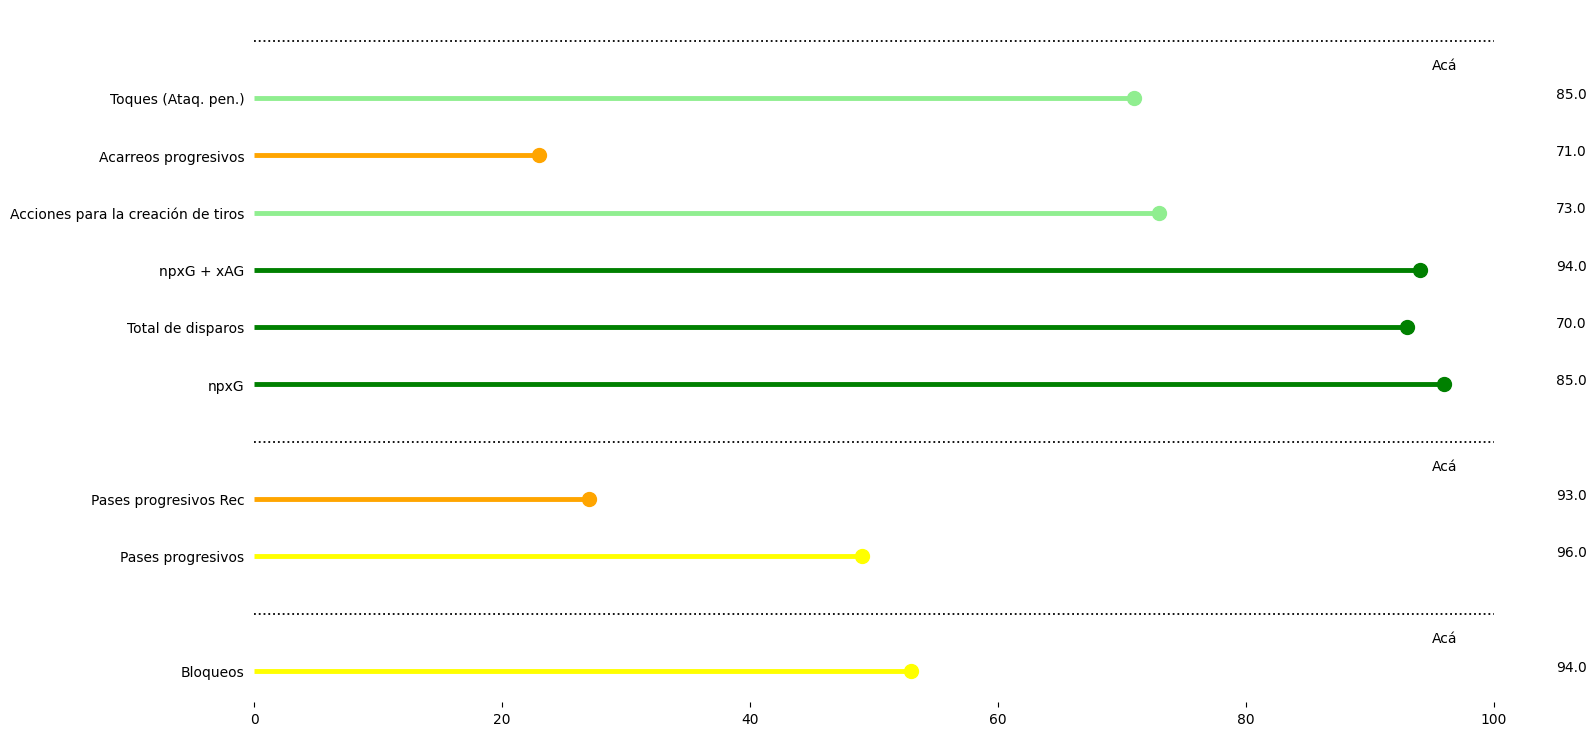

In [37]:
contador = 0
yticks_positions = []
yticks_labels = []
lineas_punteadas = []
valores_estadisticas = []
valores_percentiles = []

fig, ax = plt.subplots(figsize=(16,9))

intervalos = [0, 20, 40, 60, 80, 100]
colores = ['red', 'orange', 'yellow', 'lightgreen', 'green']

for df in dataframes:
    for i in range(len(df)):
        plt.hlines(y=contador+i,xmin=0,xmax=df['Percentil'][i], colors=df['color'][i], linewidth=3.5)
        plt.plot(df['Percentil'][i], contador+i, "o", color=df['color'][i], markersize=10)
    yticks_positions.extend(np.arange(contador, contador+df.shape[0]))  # Extender la lista de posiciones de ticks
    yticks_labels.extend(df['Estadísticas'])
    valores_estadisticas.extend(df['Por 90'])
    valores_percentiles.extend(df['Percentil'])
    plt.axhline(contador+df.shape[0], ls=':', color='black', lw=1.3)
    lineas_punteadas.append(contador+df.shape[0])
    ax.set_xlim(0,100)
    contador += df.shape[0]+1

plt.yticks(yticks_positions, yticks_labels)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, right=False)


for linea in lineas_punteadas:
    ax.text(95, linea-.5, 'Acá')

for i in range(0,len(yticks_positions)):
    ax.text(105, yticks_positions[i], percentiles['Percentil'].dropna().values[i])
    

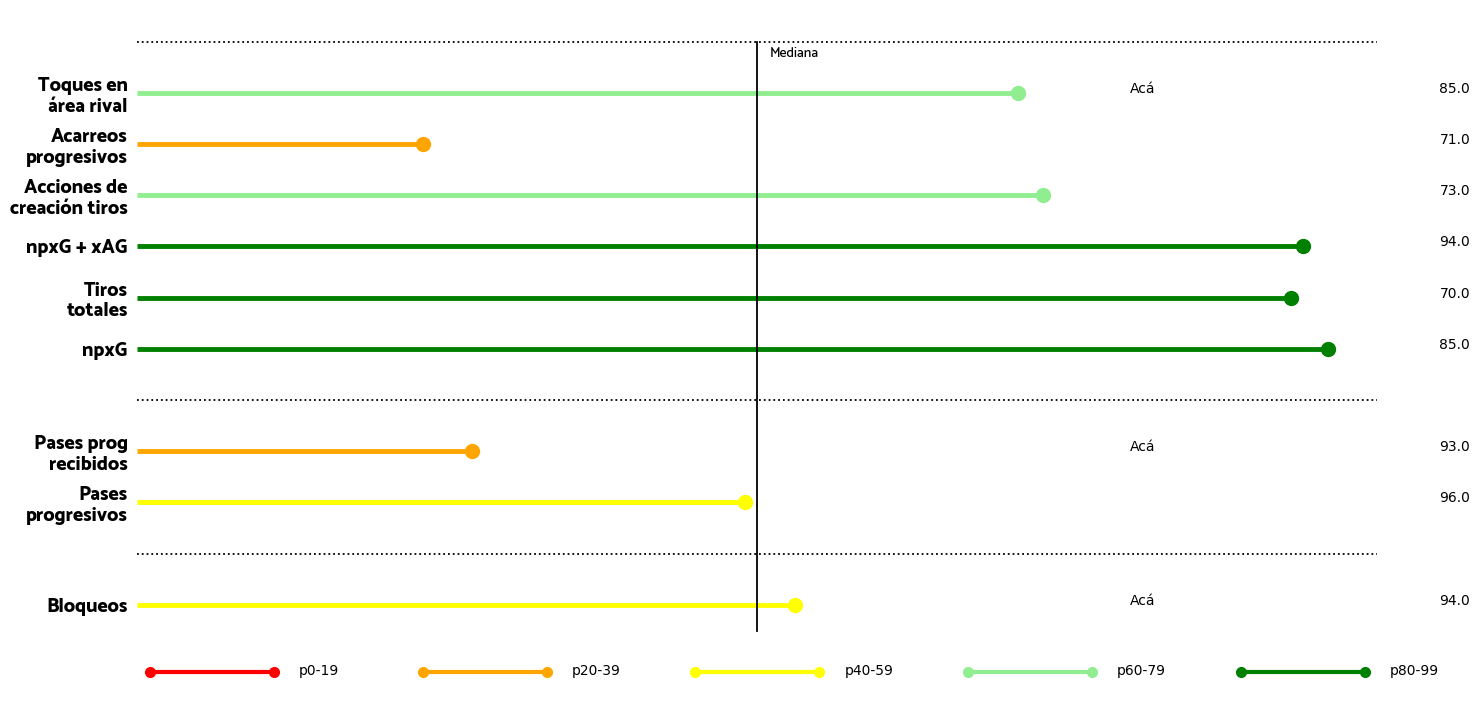

In [38]:
contador = 0
yticks_positions = []
yticks_labels = []
lineas_punteadas = []
valores_estadisticas = []
valores_percentiles = []

fig, ax = plt.subplots(figsize=(16,9))

intervalos = [0, 20, 40, 60, 80, 100]
colores = ['red', 'orange', 'yellow', 'lightgreen', 'green']

for df in dataframes:
    for i in range(len(df)):
        plt.hlines(y=contador+i,xmin=0,xmax=df['Percentil'][i], colors=df['color'][i], linewidth=3.5)
        plt.plot(df['Percentil'][i], contador+i, "o", color=df['color'][i], markersize=10)
    yticks_positions.extend(np.arange(contador, contador+df.shape[0]))  # Extender la lista de posiciones de ticks
    yticks_labels.extend(df['Estadísticas'])
    valores_estadisticas.extend(df['Por 90'])
    valores_percentiles.extend(df['Percentil'])
    plt.axhline(contador+df.shape[0], ls=':', color='black', lw=1.3)
    lineas_punteadas.append(contador+df.shape[0])
    ax.set_xlim(0,100)
    contador += df.shape[0]+1

plt.yticks(yticks_positions, yticks_labels)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, right=False)


for linea in lineas_punteadas:
    ax.text(80, linea-1, 'Acá')
    
for i in range(0,len(yticks_positions)):
    ax.text(105, yticks_positions[i], percentiles['Percentil'].dropna().values[i])

lista_reemplazada = []
for elemento in yticks_labels:
    # Contar la cantidad de espacios en el elemento
    espacios = elemento.count(' ')
    if espacios < 2:
        # Si hay menos de dos espacios, reemplazar el espacio por '\n'
        lista_reemplazada.append(elemento.replace(' ', '\n'))
    else:
        # Si hay dos o más espacios, realizar el reemplazo basado en el diccionario
        lista_reemplazada.append(reemplazos.get(elemento, elemento))

ax.set_yticks(yticks_positions, lista_reemplazada, fontproperties=catamaran.prop, size=14)
ax.plot([50,50], [-0.5,len(yticks_labels)+2],color='black', lw=1.3)
ax.text(51,len(yticks_labels)+1.7, 'Mediana', fontproperties=catamaran2.prop, size=10)

ubicacion_y = -1.3
ubicacion_x_inicial = 1
for i in range(len(colores)):
    ax.plot([ubicacion_x_inicial,ubicacion_x_inicial+10], [ubicacion_y,ubicacion_y], color=colores[i], lw=3)
    ax.plot(ubicacion_x_inicial, ubicacion_y, "o", color=colores[i], markersize=7)
    ax.plot(ubicacion_x_inicial+10, ubicacion_y, "o", color=colores[i], markersize=7)
    ax.text(ubicacion_x_inicial+12, ubicacion_y, f'p{intervalos[i]}-{intervalos[i+1]-1}', va='center')
    ubicacion_x_inicial += 22
ax.set_xticks([])

#plt.title("Premier League 16/17")
plt.savefig('thumbnail-3.png', dpi=300, bbox_inches='tight')
plt.show()